# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных - загрузите датасет, посмотрите на его `head` и `tail` и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Каков средний возраст людей в выборке?
3. [1 балл] Какова доля темнокожих людей в общем объеме выборки?
4. [1 балл] Сколько белых мужчин, старше 90 лет, погибло в результате несчастного случая?
5. [2 балла] Правда ли, что суицид, в среднем, совершают более пожилые люди? Проверьте это, используя метод `groupby`
6. [1 балл] Визуализация - при помощи метода `factorplot` из библиотеки `seaborn` постройте распределение предпочтений участников опроса (переменная 'Что Вы предпочитаете?')
7. [3 балла] Визуализация - по аналогии с семинарским занятием, постройте на одном графике оценки распределений (KDE) возраста для следующих значений переменной `intent` - 'Accidental', 'Homicide', 'Suicide'. Для этого используйте `.plot`, задав в качестве параметра kind значение 'kde'. Не забудьте добавить подписи к графикам. Чтобы график лучше читался, первой строкой можно задать размер при помощи `plt.figure` равный (15, 10), а последней строкой - ограничить отрисовку графика слева по значению 0 при помощи `plt.xlim`. Подсказка - для построения этого графика не обязательно 3 раза писать одну и ту же строчку, можно доверить подстановку текущего значения `intent` циклу `for`. 

## Итого - 10 баллов, отлично!

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, с загрузкой справились :)

In [27]:
data = pd.read_csv('/Users/macbookpro/Desktop/Alexandra_Borshenuk_Task/Alexandra_Borshenuk_guns.csv')
data


,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
5,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,1.0
6,2012,2,Undetermined,0,M,48.0,White,100,Home,2.0
7,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,2.0
8,2012,2,Accidental,0,M,50.0,White,100,Other specified,3.0
9,2012,2,Suicide,0,M,NaN,Black,998,Home,5.0


In [28]:
data.head(1)

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0


In [29]:
data.tail(1)

,year,month,intent,police,sex,age,race,hispanic,place,education
100797,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,2.0


In [30]:
data.describe() 

,year,month,police,age,hispanic,education
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


### Комментарий к решению
Всё верно

In [31]:
print('Средний возраст', data.age.mean())


Средний возраст 43.85760071442746


### Комментарий к решению
Отлично :)

In [32]:
black_people = data.loc[:,['race']][data['race'] == 'Black'].count()
share = float(black_people/100798*100)
print ('Доля темнокожих людей', share , '%')

Доля темнокожих людей 23.111569674001466 %


### Комментарий к решению
И здесь всё верно

In [33]:
white_men = (data.loc[:,['intent']][(data.sex == 'M') & (data.age >= 90) & (data.intent == 'Accidental') & (data.race == 'White')]).count()
print ('В результате несчастного случая погибло', white_men.intent, 'белых мужчин старше 90 лет')

В результате несчастного случая погибло 8 белых мужчин старше 90 лет


### Комментарий к решению
Верно

In [34]:
data.groupby('intent').age.mean()

intent
Accidental      38.043346
Homicide        32.620212
Suicide         50.310917
Undetermined    40.238213
Name: age, dtype: float64

In [35]:
suicide = int (data.loc [:, ['intent']][(data.intent == 'Suicide')].count())
age_suicide = int (data.loc [:, ['age']][(data.intent == 'Suicide')].sum())
average_suicide = age_suicide/suicide
print ('Пожилые люди больше склонны к суициду', average_suicide > 50)

Пожилые люди больше склонны к суициду True


### Комментарий к решению
И снова верно

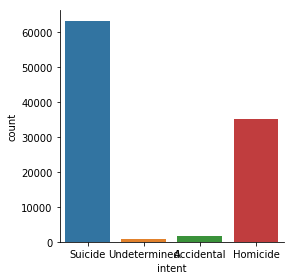

In [36]:
sns.factorplot('intent', data=data, kind='count')

### Комментарий к решению
Действительно хорошо видно, что убийства, в основном, совершают молодые люди, а вот суицид совершают ближе к 50 годам. Грустненько

Text(0.5,1,'Распределение возраста людей по мотиву')

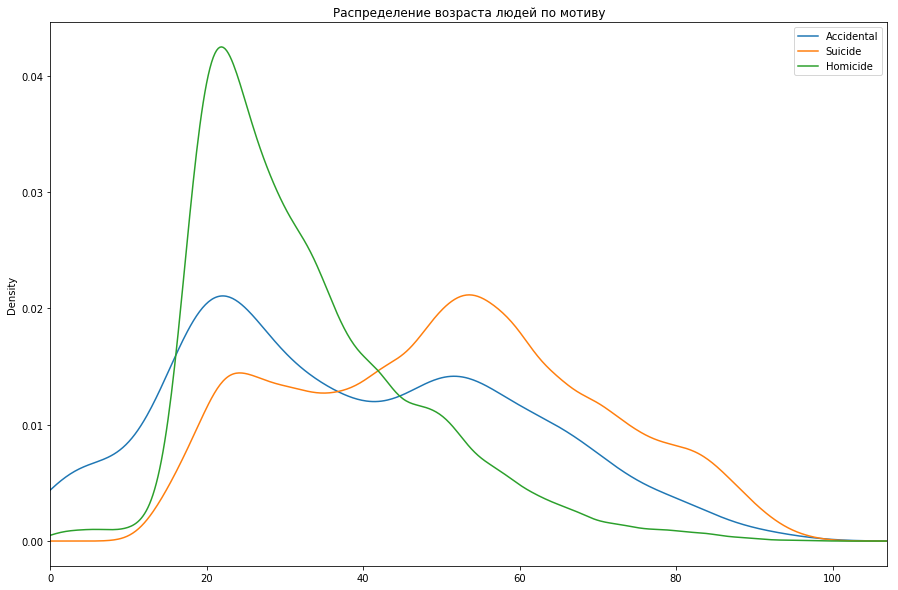

In [37]:
plt.figure(figsize=(15,10))
data ['age'] [data.intent == 'Accidental'].plot(kind = 'kde', label = 'Accidental')
data ['age'] [data.intent == 'Suicide'].plot (kind = 'kde', label = 'Suicide')
data ['age'] [data.intent == 'Homicide'].plot (kind = 'kde', label = 'Homicide')
plt.legend ();
plt.xlim (0,107)
plt.title('Распределение возраста людей по мотиву')


In [14]:
data.age.max()

107.0

In [44]:
data.age.min()

0.0